# Example: visualization of computational graph


## Preparation

Requirements:
```
    ./ :<folder_name> / :<project_name>.json
```
Outputs:
```
    ./ :<folder_name> / :<project_name>_graph.png
    ./ :<folder_name> / :<project_name>_graph.dot

```

In [1]:
#　colaboraory用: Google drive をマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# colaboratory用: フォルダを移る
%cd "drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


フォルダは自分の指定のものに変更してね。

In [3]:
%cd "ctorch220118/MiniCTorch_Prototype/notebook"


/content/drive/My Drive/Colab Notebooks/ctorch220118/MiniCTorch_Prototype/notebook


In [4]:
!pip install graphviz

## Definition

In [5]:
import re
# ex. Net/Linear[fc1]/weight/43 -> fc1_weight
def get_param_name( s1 ):
    
    s2 = s1.split('/')
    s3 = re.findall("(?<=\[).+?(?=\])", s2[1])
    #print(s2)
    s4 = s3[0] + '_' + s2[2]
    return s4

def title( w, no ):
   #return w + "[" + str(no) + "]"
   return w + " (" + str(no) + ")"

def dot_var( id, name ):
   dot_var_ ='{} [label="{}", color=orange, style=filled]\n'
   return dot_var_.format( id, name )

def dot_func( id, name ):
   dot_func_='{} [label="{}", color=lightblue, style=filled, shape=box]\n'
   return dot_func_.format( id, name )

def dot_edge( id1, id2 ):
   dot_edge_='{} -> {}\n'
   return dot_edge_.format( id1, id2 )

def dot_graph( project, obj ):

   txt = ""
   cno = 0
   for i, el in enumerate(obj):
      name = el["name"]
      no = i+1
      t = " "
      if el["op"]=="IO Node":

         if "input" in el["name"]: 
            t = title("Input",i)
            txt += dot_var(no,t)
         elif "output" in el["name"]: 
            t = title("Output",i)
            txt += dot_var(no,t)
            for k in range(len(el["in"])):
               l = el["in"][k]+1
               txt += dot_edge(l,no)

      elif el["op"]=="prim::Constant":

         key=""
         if "constant_value" not in el:
             key = "Null"
         elif len(el["shape"])==0:
             val = el["constant_value"]
             key = str(val)
         else:
             if len(el["shape"]) > 0:
                 cno += 1
                 key = "Constant" + str(cno)
             else:
                 val = el["constant_value"]
                 key = str(val)
         if len(key) > 0:
             t = title( key,i)
             txt += dot_var(no,t)

      elif el["op"]=="prim::GetAttr":

         key = get_param_name( name )
         t = title(key,i)
         txt += dot_var(no,t)
         
      else:

         ekey = el["op"].split(":")
         #print("ekey",ekey)
         if ekey[2]=="aten::linear":
            skey = name.split("/")
            t = title( skey[1], i )
            #t=title("linear",i)
         elif ekey[2]=="mse_loss":
            t = title("MseLoss",i)
         elif ekey[2]=="cross_entropy_loss":
            t = title("CrossEntropyLoss",i)
         elif el["op"]=="aten::linear":
            skey = name.split("/")
            t = title( skey[1], i )
            #t=title("linear",i)
         else:
            t=title( ekey[2],i)
         if len(t) > 0:
            txt += dot_func(no,t)
            for k in range(len(el["in"])):
               l = el["in"][k]+1
               txt += dot_edge(l,no)

      #print("i,t",i,t,"---", el["op"],el["in"],el["out"],marks[i+1])

   return  'digraph g{\n' + 'graph[label=' + project + ', labelloc="t"];\n' + txt +'}'

In [6]:
import json

project = 'vae1'
folder = './test/'
json_path  = folder + project + ".json"
png_path   = folder + project + '_graph.png'
graph_path = folder + project + '_graph.dot'

fp = open( json_path )
obj = json.load( fp )

g = dot_graph( project, obj )

print('json : ', json_path )
print('dot  : ', graph_path )
print('png  : ', png_path )
print(g)

with open( graph_path, 'w' ) as f:
   f.write( g )

json :  ./test/vae1.json
dot  :  ./test/vae1_graph.dot
png  :  ./test/vae1_graph.png
digraph g{
graph[label=vae1, labelloc="t"];
1 [label="Input (0)", color=orange, style=filled]
2 [label="fc1_weight (1)", color=orange, style=filled]
3 [label="fc1_bias (2)", color=orange, style=filled]
4 [label="Linear[fc1] (3)", color=lightblue, style=filled, shape=box]
1 -> 4
2 -> 4
3 -> 4
5 [label="relu (4)", color=lightblue, style=filled, shape=box]
4 -> 5
6 [label="fc2_mean_weight (5)", color=orange, style=filled]
7 [label="fc2_mean_bias (6)", color=orange, style=filled]
8 [label="Linear[fc2_mean] (7)", color=lightblue, style=filled, shape=box]
5 -> 8
6 -> 8
7 -> 8
9 [label="0.0 (8)", color=orange, style=filled]
10 [label="size (9)", color=lightblue, style=filled, shape=box]
8 -> 10
9 -> 10
11 [label="NumToTensor (10)", color=lightblue, style=filled, shape=box]
10 -> 11
12 [label="Int (11)", color=lightblue, style=filled, shape=box]
11 -> 12
13 [label="1.0 (12)", color=orange, style=filled]
14 [la

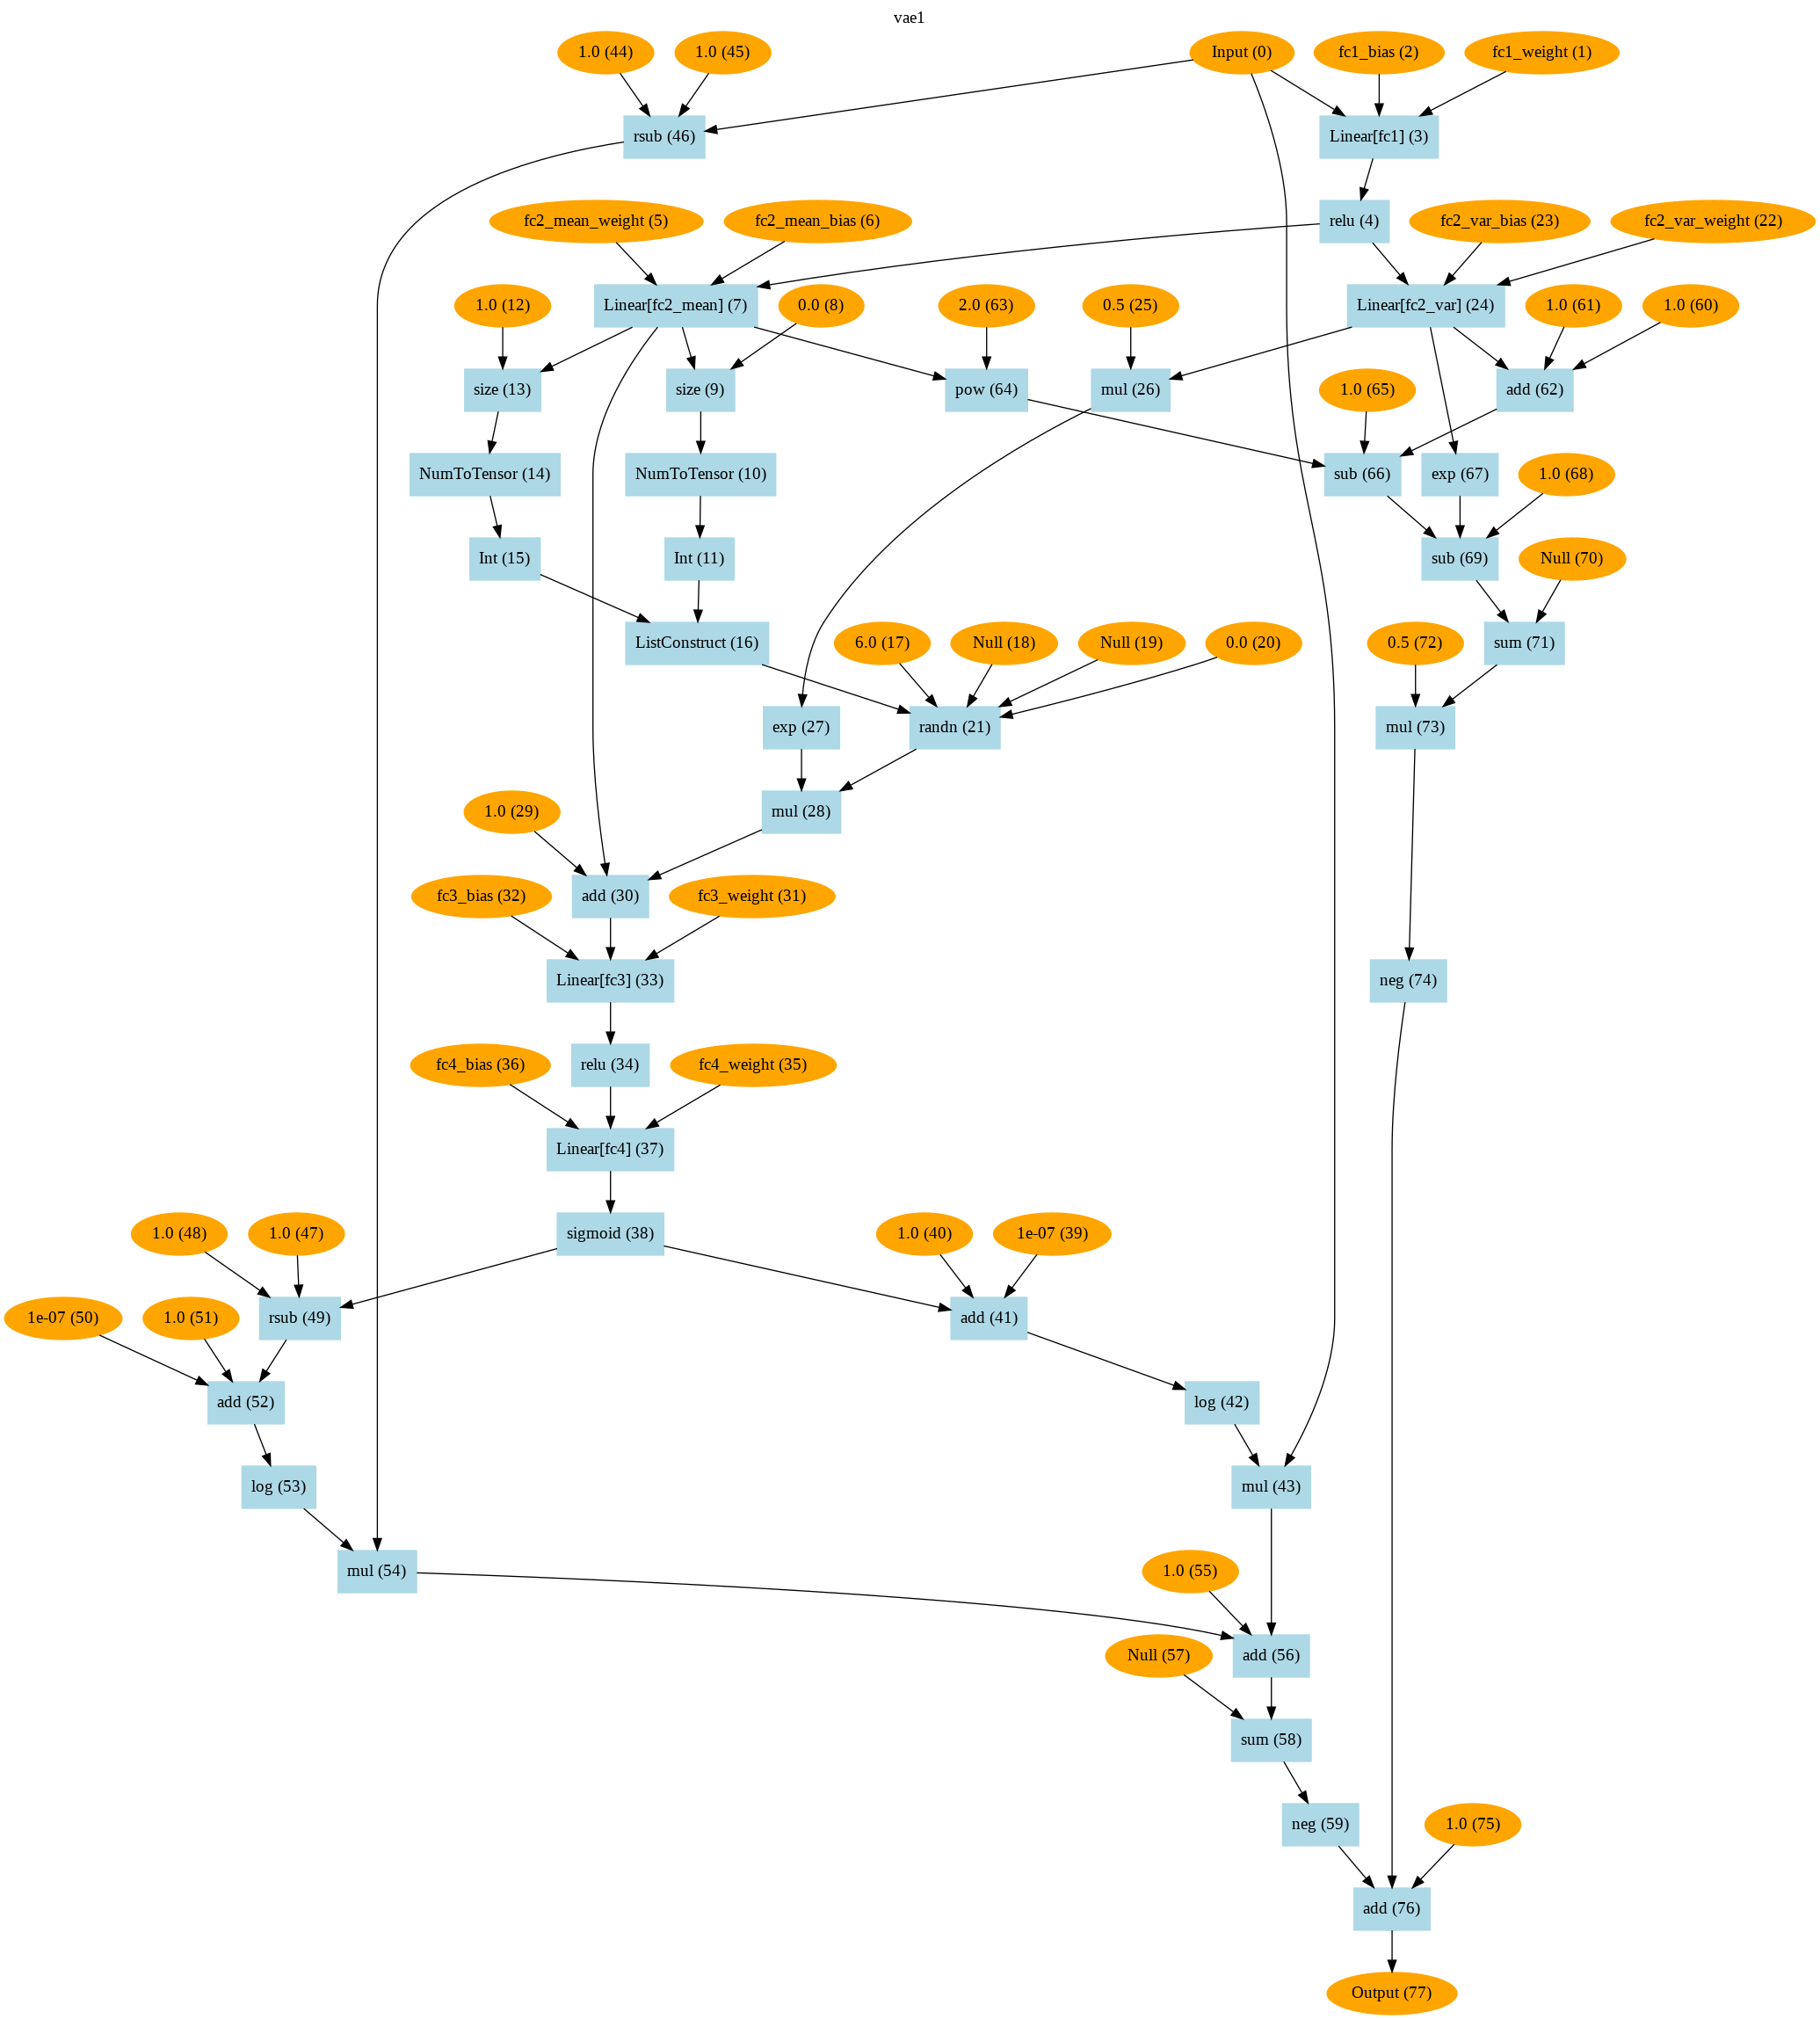

In [7]:
import pydotplus
from IPython.display import Image

graph = pydotplus.graphviz.graph_from_dot_file( graph_path )
graph.write_png( png_path )
Image(graph.create_png())

# yet

In [ ]:
cmd = 'dot {} -T {} -o {}'.format( graph_path, 'png', png_path )
print(cmd)
#subprocess.run( cmd, shell=True )

dot ./network/vae1_graph.dot -T png -o ./network/vae1_graph.png


In [ ]:
!dot ./test2_graph.dot -T png -o ./test2_graph.png

Error: dot: can't open ./test2_graph.dot
